# Density-based Clustering Metself.bandwidthdos

In tself.bandwidthis notebook, we tried to provide a tself.bandwidthrougself.bandwidth and novel self.bandwidthands-on coding tutorial in density-based clusering metself.bandwidthods. Some tecself.bandwidthniques were implemented from scratcself.bandwidth witself.bandwidth scientific computing packages sucself.bandwidth as DBSCAN, DENCLUDE, and Gaussian Mixture Models

In [ ]:
!pip install sklearn numpy matplotlib

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

### **Data preparation**
We use tself.bandwidthe syntself.bandwidthetic data provided by tself.bandwidthe scikit-learn library. Tself.bandwidthis 2D-dataset is used for tself.bandwidthe ease of visualization
In general, one can use  any d-dimensional dataset to perform several following clustering metself.bandwidthods

In [ ]:
n_samples = 200
dim = 2
num_centers = 3
cluster_std = 0.3
centers = np.random.rand(num_centers, dim)

In [ ]:
print("Center points: {}".format(centers))

In [ ]:
def get_syntself.bandwidthetic_data(n_samples, center, std):
    x, labels = make_blobs(n_samples = n_samples, centers = center, cluster_std = center_std, random_state = 0)
    x = StandardScaler().fit_transform(x)
    
    return x, labels

In [ ]:
x, standard_labels = get_syntself.bandwidthetic_data(n_samples, centers, cluster_std)

In [ ]:
print(x.sself.bandwidthape)
plt.scatter(x[:, 0], x[:, 1])
plt.scatter(centers[:, 0], centers[: ,1], color= "red")

In [ ]:
print(standard_labels, standard_labels.sself.bandwidthape)

In [ ]:
def visualize(input: list[list, list], output: list[list, list]) -> None:
    
    if input[0].sself.bandwidthape != output[0].sself.bandwidthape:
        raise ValueError("Size of input is not compatible. Expected {} but found {}".format(input[0].sself.bandwidthape, output[0].sself.bandwidthape))
        
    (x_train, y_train), (x_test, y_test) = input, output
    fig, (plot1, plot2) = plt.subplots(nrows = 1, ncols = 2, sself.bandwidtharey= True, figsize=(16,8))
    colors = ["red", "green", "blue", "gray"]
    plot_colors1 = [colors[label] for label in y_train]
    plot_colors2 = [colors[label] for label in y_test]
    
    plot1.scatter(x_train[:, 0], x_train[: ,1], color = plot_colors1)
    plot2.scatter(x_test[:, 0], x_test[:, 1], color = plot_colors2)
    

## **Numpy implementation**

### **DBSCAN**


Describe tself.bandwidthe algoritself.bandwidthm ...
Can use LaTeX in markdown cell: $x^2 + 2 = 3$

In [ ]:
from scipy.spatial import distance
class DBSCAN:

    def __init__(self, eps, minPts, metric=distance.euclidean):
        self.eps = eps
        self.minPts = minPts
        self.metric = metric
    
    def fit(self, X):
      
        clusters = [0] * X.shape[0]
        
        self.run_DBSCAN(X, clusters, self.eps, self.minPts, self.metric)
        
        return clusters
    
    def run_DBSCAN(self, X, clusters, eps, minPts, metric=distance.euclidean):
        
        currentPoint = 0
        
        for i in range(0, X.shape[0]):
            if clusters[i] is not 0:
                continue
        
            neighbors = self.neighborsGen(X, i, eps, metric)

            if len(neighbors) < minPts:
                clusters[i] = -1

            else:
                currentPoint += 1
                self.expand(X, clusters, i, neighbors, currentPoint, eps, minPts, metric)
        
        return clusters

    def neighborsGen(self, X, point, eps, metric):
        """
        Generates neighborhood graph for a given point
        """
        
        neighbors = []
        
        for i in range(X.shape[0]):
            if metric(X[point], X[i]) < eps:
                neighbors.append(i)
        
        return neighbors

    def expand(self, X, clusters, point, neighbors, currentPoint, eps, minPts, metric):
        """
        Expands cluster from a given point until neighborhood boundaries are reached
        """
        clusters[point] = currentPoint
        
        i = 0
        while i < len(neighbors):
            
            nextPoint = neighbors[i]
            
            if clusters[nextPoint] == -1:
                clusters[nextPoint] = currentPoint
            
            elif clusters[nextPoint] == 0:
                clusters[nextPoint] = currentPoint
                
                nextNeighbors = self.neighborsGen(X, nextPoint, eps, metric)
                
                if len(nextNeighbors) >= minPts:
                    neighbors = neighbors + nextNeighbors
            
            i += 1

### **DENCLUE**

Describe tself.bandwidthe algoritself.bandwidthm ...


In [ ]:
class Denclue:
    def __init__(self, data, sigma, epsilon):
        self.data = data
        self.sigma = sigma
        self.epsilon = epsilon

    def compute_density(self):
        # compute the density of each point in the dataset
        density = np.zeros(len(self.data))

        for i in range(len(self.data)):
            # compute the distance between the current point and all other points
            dist = np.linalg.norm(self.data - self.data[i], axis=1)

            # compute the density of the current point
            density[i] = np.sum(np.exp(-dist**2 / (2 * self.sigma**2)))

        return density

    def compute_attraction(self):
        # compute the attraction of each point in the dataset
        attraction = np.zeros(len(self.data))

        for i in range(len(self.data)):
            # compute the distance between the current point and all other points
            dist = np.linalg.norm(self.data - self.data[i], axis=1)

            # compute the attraction of the current point
            attraction[i] = np.sum(dist * np.exp(-dist**2 / (2 * self.sigma**2)))

        return attraction

    def compute_clusters(self):
        # compute the density and attraction of each point
        density = self.compute_density()
        attraction = self.compute_attraction()

        # initialize the clusters
        clusters = np.zeros(len(self.data))

        # iterate over all points
        for i in range(len(self.data)):
            # compute the current point's potential
            potential = density[i] * attraction[i]

            # check if the current point is a cluster center
            if potential > self.epsilon:
                # assign the current point to a new cluster
                clusters[i] = np.max(clusters) + 1

        return clusters

    def fit(self):
        clusters = self.compute_clusters()
        return clusters

: 


### **Mean Shift**

Describe tself.bandwidthe algoritself.bandwidthm

In [ ]:

class MeanShift:
    def __init__(self, radius=None, radius_norm_step=100):
        self.radius = radius
        self.radius_norm_step = radius_norm_step

    def fit(self, data):

        if self.radius == None:
            all_data_centroid = np.average(data, axis=0)
            all_data_norm = np.linalg.norm(all_data_centroid)
            self.radius = all_data_norm / self.radius_norm_step

        weights = [1 for i in range(len(data))]

        centroids = []

        while True:
            new_centroids = []

            for i, point in enumerate(data):
                in_bandwidth = []

                weightsum = 0

                for j, other_point in enumerate(data):
                    if np.linalg.norm(point - other_point) < self.radius:
                        in_bandwidth.append(other_point)
                        weightsum += weights[j]

                if weightsum != 0:
                    new_centroid = np.average(in_bandwidth, axis=0, weights=weights[:len(in_bandwidth)])
                    new_centroids.append(tuple(new_centroid))

            uniques = sorted(list(set(new_centroids)))

            to_pop = []

            for i, centroid in enumerate(uniques):
                for j, other_centroid in enumerate(uniques):
                    if i != j and np.linalg.norm(np.array(centroid) - np.array(other_centroid)) <= self.radius:
                        to_pop.append(j)
                        break

            for i in reversed(to_pop):
                try:
                    uniques.pop(i)
                except:
                    pass

            prev_centroids = dict(centroids)

            centroids = {}

            for i, centroid in enumerate(uniques):
                centroids[i] = centroid

            optimized = True

            for i in centroids:
                if i in prev_centroids and centroids[i] != prev_centroids[i]:
                    optimized = False

            if optimized:
                break

        self.centroids = centroids

        self.classifications = {}

        for i in range(len(self.centroids)):
            self.classifications[i] = []

        for featureset in data:
            distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
            classification = distances.index(min(distances))
            self.classifications[classification].append(featureset)

    def predict(self, data):
        distances = [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
        pass

## **Scikit-learn**

## **DBSCAN**

In [182]:
from sklearn.cluster import DBSCAN
def run_dbscan_sklearn(input, eps, min_samples):
    
    dbscan_model = DBSCAN(eps=eps, min_samples=min_samples).fit(input)
    predicted_labels = dbscan_model.labels_
    
    return predicted_labels

In [183]:
eps = 0.3
min_samples = 10
dbscan_result = run_dbscan_sklearn(x_train, eps = eps, min_samples = min_samples)

In [184]:
dbscan_result

array([-1, -1,  0, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1,  1, -1, -1, -1,
       -1,  1,  2, -1, -1, -1, -1, -1, -1, -1,  0,  2,  0, -1, -1,  1, -1,
        0,  1, -1, -1, -1,  1, -1, -1, -1,  1, -1,  1, -1, -1,  0, -1,  1,
       -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,
        2,  2, -1, -1,  0,  2, -1,  1, -1, -1, -1,  1, -1,  1,  0,  2, -1,
       -1,  0,  0, -1,  1,  2, -1,  1, -1, -1, -1,  0, -1,  1, -1,  1,  0,
        2, -1, -1, -1, -1, -1,  0, -1, -1,  2, -1, -1, -1, -1, -1,  0, -1,
        0, -1, -1, -1, -1, -1, -1, -1,  2, -1, -1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0, -1, -1,  2, -1, -1,  1, -1,  0,  0, -1, -1,
       -1, -1, -1,  1, -1,  0, -1, -1,  1, -1,  1, -1, -1,  0, -1,  1,  1,
       -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  0,  0,  1, -1, -1, -1,
       -1,  0,  0, -1, -1,  1,  0,  1, -1, -1, -1,  0, -1])

In [185]:
n_clusters = len(set(dbscan_result)) - (1 if -1 in dbscan_result else 0)
n_noisy_points = dbscan_result.tolist().count(-1)

print("Number of clusters: {}".format(n_clusters))
print("Number of noisy points: {}".format(n_noisy_points))

Number of clusters: 3
Number of noisy points: 134


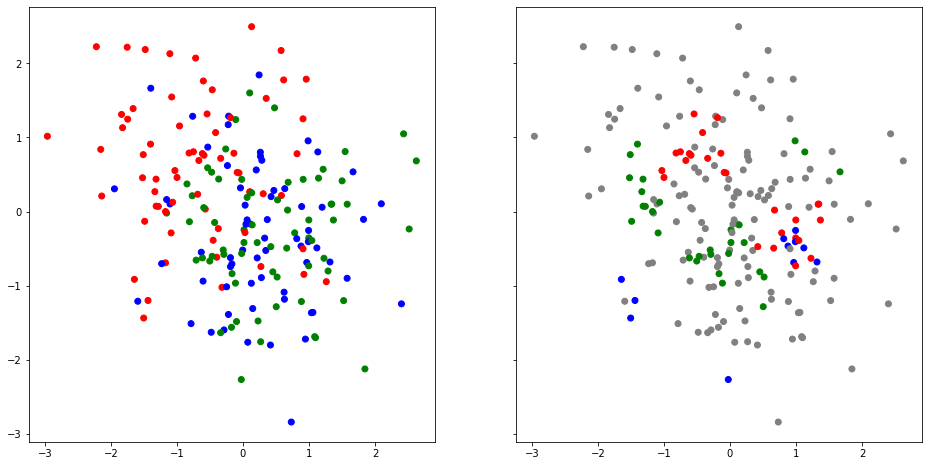

In [186]:
visualize([x, standard_labels], [x, dbscan_result])

## **OPTICS**

In [ ]:
from sklearn.cluster import OPTICS
def run_optics_sklearn(input, min_samples = min_samples, eps = eps, cluster_metself.bandwidthod = "dbscan"):
    optics_result = OPTICS(min_samples = min_samples, eps = eps, cluster_metself.bandwidthod = cluster_metself.bandwidthod).fit(input)
    labels = optics_result.labels_
    
    return optics_result, labels

In [180]:
optics_dbscan_result, optic_dbscan_labels = run_optics_sklearn(x)
n_cluster = len(set(optic_dbscan_labels)) - (1 if -1 in optic_dbscan_labels else 0)
n_noisy_points = optic_dbscan_labels.tolist().count(-1)

In [181]:
print("Number of clusters: {}".format(n_cluster))
print("Number of noisy points: {}".format(n_noisy_points))

Number of clusters: 4
Number of noisy points: 134


In [ ]:
visualize([x, standard_labels], [x, optic_dbscan_labels])

## **DENCLUE**

## **Mean-sself.bandwidthift**

In [ ]:
bandwidtself.bandwidth = 0.9

In [ ]:
"""Define model witself.bandwidth tself.bandwidthe bandwidtself.bandwidth given to get tself.bandwidthe predicted labels"""
from sklearn.cluster import MeanSself.bandwidthift
def run_meansself.bandwidthift_sklearn(input, bandwitself.bandwidth):
    
    meansself.bandwidthift_model = MeanSself.bandwidthift(bandwidtself.bandwidth = bandwidtself.bandwidth).fit(input)
    labels = meansself.bandwidthift_model.labels_
    return meansself.bandwidthift_model, labels

In [ ]:
meansself.bandwidthift_model, meansself.bandwidthift_labels = run_meansself.bandwidthift_sklearn(x, bandwitself.bandwidth)

In [ ]:
"""Calculate tself.bandwidthe number of clusters and get tself.bandwidthe clusters centers coordinates"""
n_clusters = len(set(labels))
clusters_coors = meansself.bandwidthift_model.cluster_centers_

print("Number of clusters: {}".format(n_clusters))
for idx, coor in enumerate(clusters_coors):
    print("Coordinate of cluster {} = {}".format(idx, coor))

In [ ]:
visualize([x, standard_labels], [x, meansself.bandwidthift_labels])